# IMDB Movie Data Analysis  

## Data Loading & Initial Inspection

Import pandas, load the data into a Pandas dataframe and inspect the data. 
This will include finding any null values that I will later need to either replace or remove, as well as displaying data types for each column which may need to be altered. 

In [1]:
import pandas as pd

file_path = "imdb_top_1000.csv"

df = pd.read_csv(file_path)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [3]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [4]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Data Cleaning & Preparation

This will include removing rows with missing values, correcting some, and covnerting columns to the correct data type.

In [5]:
df.dropna(subset=['Gross'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 110.4+ KB


In [6]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

In [7]:
incorrect_row = df[df['Released_Year']== 'PG']
incorrect_row

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [8]:
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

In [9]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 1995, '1953'], dtype=object)

In [10]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'] = df['Released_Year'].astype('Int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    Int64  
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    object 
dtypes: Int64(1), float64(2), int64(1), object(12)
memory usage: 111.2+ KB


In [12]:
df['Released_Year'].isnull().sum()

0

In [13]:
df['Runtime'].describe

<bound method NDFrame.describe of 0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
990    157 min
991    144 min
992     78 min
994     87 min
997    118 min
Name: Runtime, Length: 831, dtype: object>

In [14]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'],errors='coerce')
df['Runtime'] = df['Runtime'].astype('Int64')

In [15]:
df['Gross'].unique()

array(['28,341,469', '134,966,411', '534,858,444', '57,300,000',
       '4,360,000', '377,845,905', '107,928,762', '96,898,818',
       '292,576,195', '37,030,102', '315,544,750', '330,252,182',
       '6,100,000', '342,551,365', '171,479,930', '46,836,394',
       '290,475,067', '112,000,000', '53,367,844', '188,020,017',
       '7,563,397', '10,055,859', '216,540,909', '136,801,374',
       '57,598,247', '100,125,643', '130,742,922', '322,740,140',
       '269,061', '335,451,311', '13,092,000', '13,182,281', '53,089,891',
       '132,384,315', '32,572,577', '187,705,427', '6,719,864',
       '23,341,568', '19,501,238', '422,783,777', '204,843,350',
       '11,990,401', '210,609,762', '5,321,508', '32,000,000',
       '1,024,560', '163,245', '19,181', '1,661,096', '5,017,246',
       '12,391,761', '190,241,310', '858,373,000', '678,815,482',
       '209,726,015', '162,805,434', '448,139,099', '6,532,908',
       '1,223,869', '223,808,164', '11,286,112', '707,481', '25,544,867',
      

In [16]:
df['Gross'].describe()

count           831
unique          823
top       4,360,000
freq              5
Name: Gross, dtype: object

In [17]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    Int64  
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    Int64  
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    int64  
dtypes: Int64(2), float64(2), int64(2), object(10)
memory usage: 112.0+ KB


In [26]:
df['Certificate'].fillna('Unknown', inplace=True)
print(df['Certificate'].isnull().sum())

0


In [ ]:
median_metascore = df['Meta_score'].median()
df['Meta_score'] = df['Meta_score'].fillna(median_metascore)
print("Number of missing values after filling:", df['Meta_score'].isnull().sum())

Number of missing values after filling: 0


In [21]:
df['Meta_score'].isnull().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    Int64  
 3   Certificate    831 non-null    object 
 4   Runtime        831 non-null    Int64  
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     831 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    int64  
dtypes: Int64(2), float64(2), int64(2), object(10)
memory usage: 112.0+ KB


## Exploratory Analysis

### Critic Scores Vs. Audience Scores

I will create a scatter plot here that will show any correlation between the Critics Ratings and the Viewer ratings.

In the second chart, I will display the top rated directors based on their IMDb rating, only if they have more than 5 or more movies in the database.

In [23]:
correlation = df['Meta_score'].corr(df['IMDB_Rating'])
print(f'The Correlation betweeen IMDB Rating and Meta Score is {correlation: .2f}')

The Correlation betweeen IMDB Rating and Meta Score is  0.28


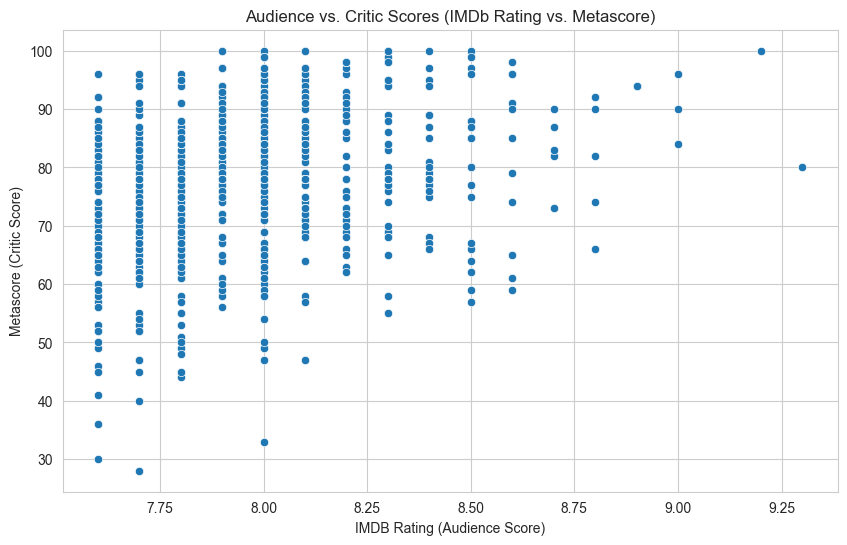

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df)

plt.title('Audience vs. Critic Scores (IMDb Rating vs. Metascore)')
plt.xlabel('IMDB Rating (Audience Score)')
plt.ylabel('Metascore (Critic Score)')

plt.show()

### Top Director Performance

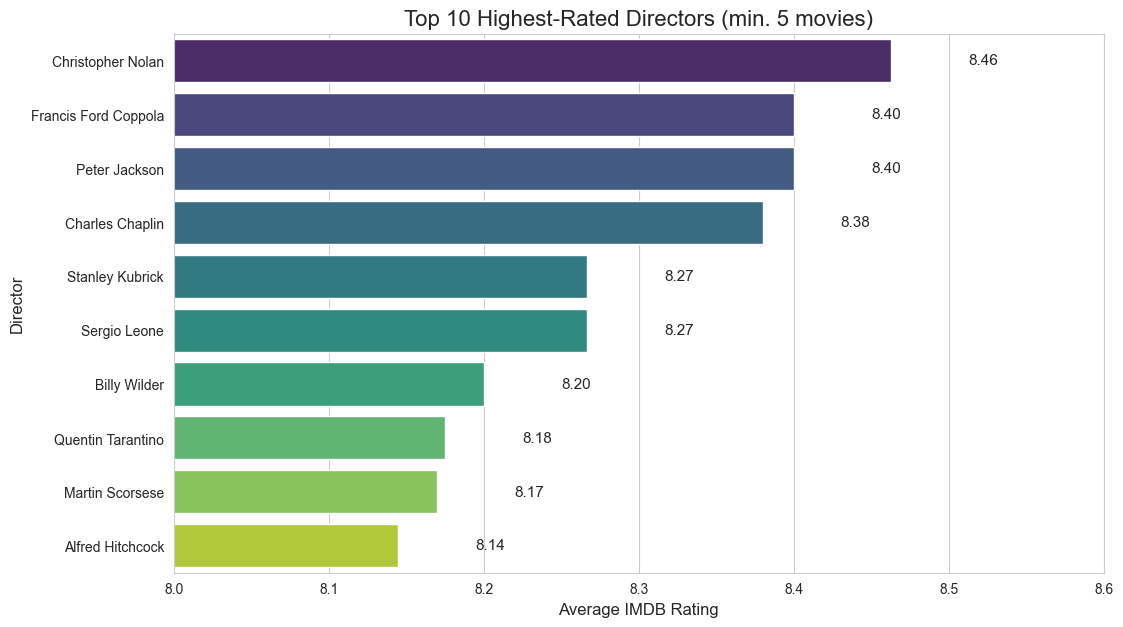

In [31]:
director_stats = df.groupby('Director').agg(
    avg_rating=('IMDB_Rating', 'mean'),
    movie_count=('Series_Title', 'count')
)

reliable_directors = director_stats[director_stats['movie_count'] >= 5]

highest_rated_directors = reliable_directors.sort_values(
    by='avg_rating', ascending=False
).head(10).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='avg_rating',
    y='Director',
    data=highest_rated_directors,
    palette='viridis',
    hue='Director',
    legend=False
)

for p in ax.patches:
    bar_width = p.get_width()
    y_position = p.get_y() + p.get_height() / 2
    text_label = f'{bar_width:.2f}'

    ax.text(
        x=bar_width + 0.05,
        y=y_position,
        s=text_label,
        ha='left',
        va='center',
        fontsize=11
    )

plt.title('Top 10 Highest-Rated Directors (min. 5 movies)', fontsize=16)
plt.xlabel('Average IMDB Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xlim(8.0, 8.6)

plt.show()